# Logistic Regression
___

Logistic regression is a powerful statistical method used for binary classification and probability estimation. It serves as a fundamental tool in machine learning and data analysis across various fields, including healthcare, finance, and marketing.

#### Mathematical Foundation

At the heart of logistic regression is the logistic function, also known as the sigmoid function:

$$P(Y = 1 | X) = \frac{1}{1 + e^{-(β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n)}}$$

This function maps any real-valued input to a probability between 0 and 1. The model estimates the coefficients (β) using maximum likelihood estimation, typically through optimization techniques like the Newton-Raphson algorithm.

#### Purpose and Applications

Logistic regression is primarily used for:

1. **Binary Classification**: Predicting outcomes with two possible classes, such as yes/no or true/false.
2. **Probability Estimation**: Calculating the likelihood of an event occurring based on input variables.
3. **Risk Assessment**: In fields like medicine and finance, it helps evaluate the probability of diseases or loan defaults.

## Benefits

**Interpretability**: Logistic regression provides easily interpretable results, allowing analysts to understand the impact of each variable on the outcome.

**Efficiency**: It performs well with both small and large datasets, making it versatile for various applications[1].

**Versatility**: The model can handle multiple input variables, including both categorical and continuous predictors[3].

**Probability Output**: Unlike some other classification methods, logistic regression directly outputs probabilities, which are useful in decision-making processes.

## Limitations

**Assumption of Linearity**: Logistic regression assumes a linear relationship between the input variables and the log-odds of the outcome, which may not always hold true in real-world scenarios.

**Limited to Binary Outcomes**: In its basic form, logistic regression is designed for binary classification tasks. For multi-class problems, extensions like multinomial logistic regression are required.

**Overfitting Risk**: With large datasets or many predictors, logistic regression can be prone to overfitting, potentially capturing noise rather than true patterns.

**Multicollinearity Issues**: When predictor variables are highly correlated, it can lead to unstable and unreliable coefficient estimates.
___
**Dataset**: Penguins


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from em_el.neuron import SingleNeuron
from em_el.activations import sigmoid
from em_el.loss_functions import binary_cross_entropy
from em_el.utils import draw_confusion_matrix

In [2]:
penguins = sns.load_dataset('penguins').dropna()
gentoo = penguins[penguins.species == 'Gentoo']
adelie = penguins[penguins.species == 'Adelie']

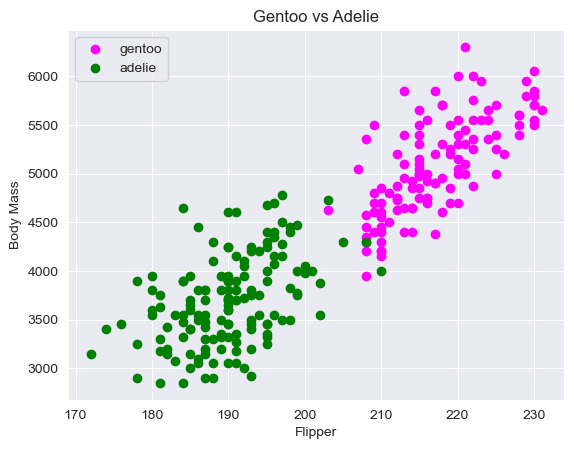

In [3]:
plt.scatter(gentoo.flipper_length_mm, gentoo.body_mass_g, color="magenta", label="gentoo")
plt.scatter(adelie.flipper_length_mm, adelie.body_mass_g, color="green", label="adelie")
plt.xlabel('Flipper')
plt.ylabel('Body Mass')
plt.title('Gentoo vs Adelie')
plt.legend()
plt.show()

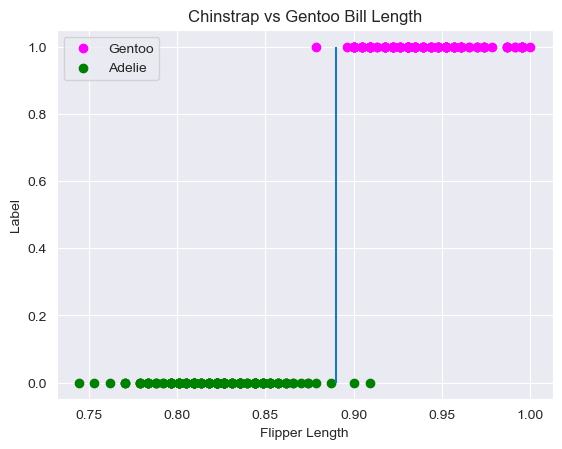

In [8]:
plt.scatter(gentoo.flipper_length_mm.values / gentoo.flipper_length_mm.max(), np.ones(gentoo.shape[0]), color="magenta", label="Gentoo")
plt.scatter(adelie.flipper_length_mm.values / gentoo.flipper_length_mm.max(), np.zeros(adelie.shape[0]), color="green", label="Adelie")
plt.xlabel('Flipper Length')
plt.ylabel('Label')
plt.title('Chinstrap vs Gentoo Bill Length')
plt.vlines(0.89, 0, 1)
plt.legend()
plt.show()

In [101]:
def sigmoid_preactivation(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def cross_entropy_loss(y_hat, y):
    return -y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [10]:
gentoo_norm = gentoo.flipper_length_mm.values / gentoo.flipper_length_mm.max()
adelie_norm = adelie.flipper_length_mm.values / gentoo.flipper_length_mm.max()

X = np.append(gentoo_norm, adelie_norm).reshape(-1, 1)
y_temp = np.append(gentoo.species, adelie.species).reshape(-1, 1)
y = np.where(y_temp == "Gentoo", 1, 0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

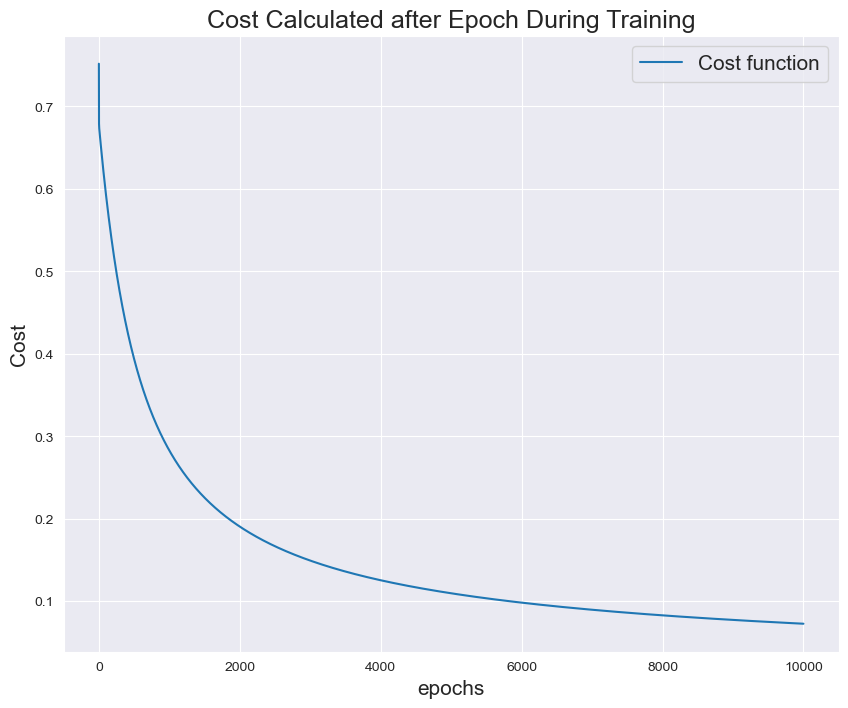

In [14]:
node = SingleNeuron(sigmoid, binary_cross_entropy)
node.train(X_train, y_train, alpha=0.01, epochs = 10000)
node.plot_cost_function()

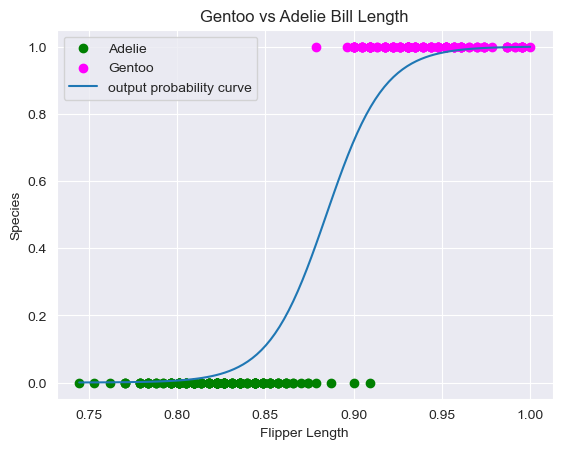

In [15]:
plt.scatter(adelie_norm, np.zeros(adelie.shape[0]), color="green", label="Adelie")
plt.scatter(gentoo_norm, np.ones(gentoo.shape[0]), color="magenta", label="Gentoo")
plt.xlabel('Flipper Length')
plt.ylabel('Species')
plt.title('Gentoo vs Adelie Bill Length')
domain = np.linspace(min(adelie_norm), max(gentoo_norm), 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)), label='output probability curve')
plt.legend()
plt.show()

In [16]:
y_hat = np.rint(node.predict(X_test))

classification_success = np.mean(np.int_(np.rint(node.predict(X_test.reshape(-1, 1))) == y_test.reshape(-1, 1)))
classification_error = 1 - classification_success
print(f"Classification error = {classification_error}")

Classification error = 0.49832924927600797


Accuracy Score = 0.9552238805970149
Classification report =               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.96        35

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67

Confusion Matrix:
[[30  2]
 [ 1 34]]


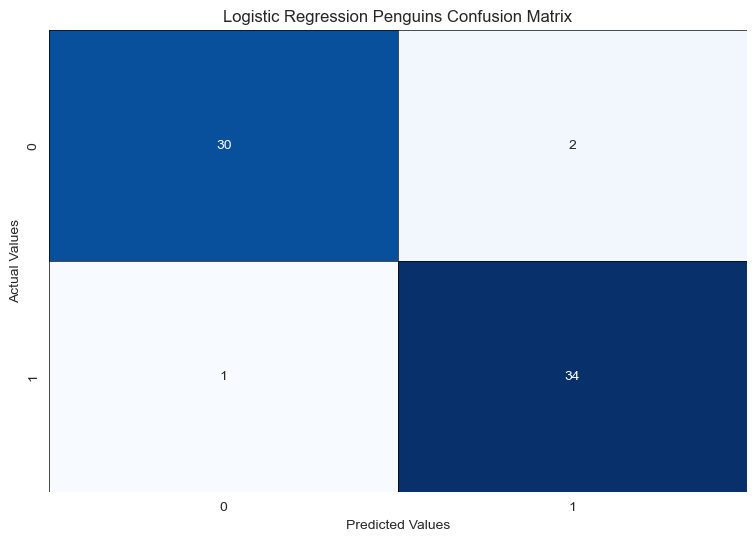

In [19]:
clf_acc = accuracy_score(y_test, y_hat)
print(f"Accuracy Score = {clf_acc}")

class_report = classification_report(y_test, y_hat)
print(f"Classification report = {class_report}")

confusion_matrix = confusion_matrix(y_test, y_hat)
print(f"Confusion Matrix:\n{confusion_matrix}")

draw_confusion_matrix(confusion_matrix, "Logistic Regression Penguins Confusion Matrix")